# Leaf disease Detection #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
try:
    df = pd.read_csv('train_labels.csv')
    display(df.head())
    print(df.shape)
    df.info()
except FileNotFoundError:
    print("Error: 'train_labels.csv' not found.")


,filename,width,height,class,xmin,ymin,xmax,ymax
0,10.jpg,256,256,GroundNut_Leaf,92,142,141,225
1,10.jpg,256,256,GroundNut_Leaf,144,139,215,190
2,10.jpg,256,256,GroundNut_Leaf,110,82,196,132
3,10.jpg,256,256,GroundNut_Leaf,78,69,105,104
4,10.jpg,256,256,GroundNut_Leaf,215,78,242,101


(1634, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1634 non-null   object
 1   width     1634 non-null   int64 
 2   height    1634 non-null   int64 
 3   class     1634 non-null   object
 4   xmin      1634 non-null   int64 
 5   ymin      1634 non-null   int64 
 6   xmax      1634 non-null   int64 
 7   ymax      1634 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 102.3+ KB


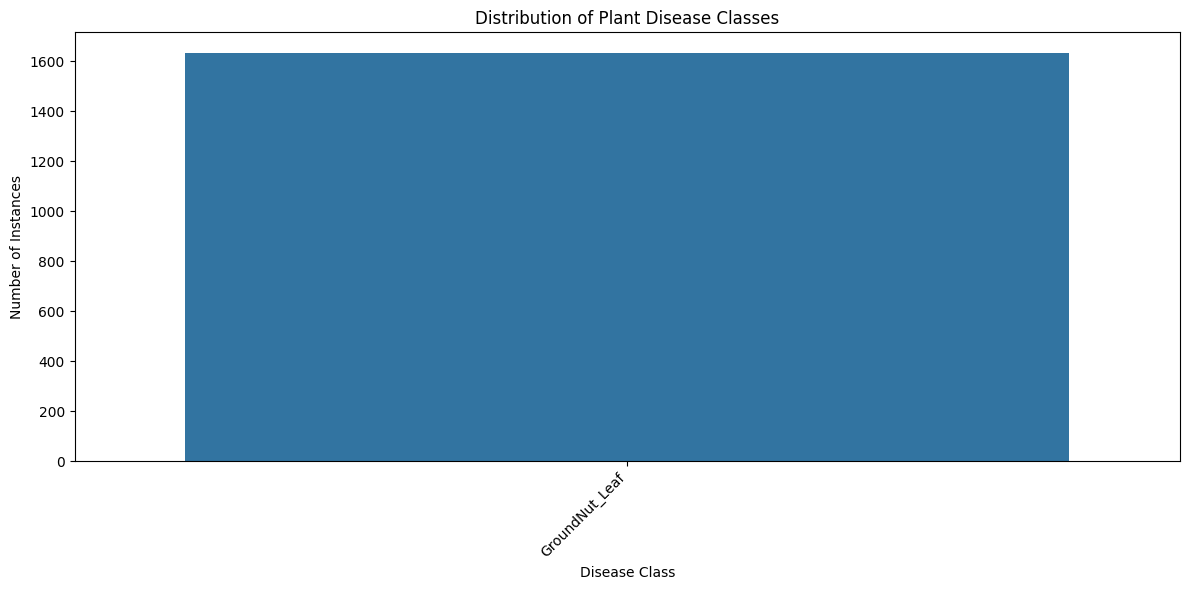

Class Percentages:
 class
GroundNut_Leaf    100.0
Name: count, dtype: float64


In [8]:

# Class Distribution
class_counts = df['class'].value_counts()
class_percentages = (class_counts / len(df)) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Plant Disease Classes')
plt.xlabel('Disease Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Class Percentages:\n", class_percentages)


Image Dimensions Summary Statistics:
        width  height
count  1634.0  1634.0
mean    256.0   256.0
std       0.0     0.0
min     256.0   256.0
25%     256.0   256.0
50%     256.0   256.0
75%     256.0   256.0
max     256.0   256.0


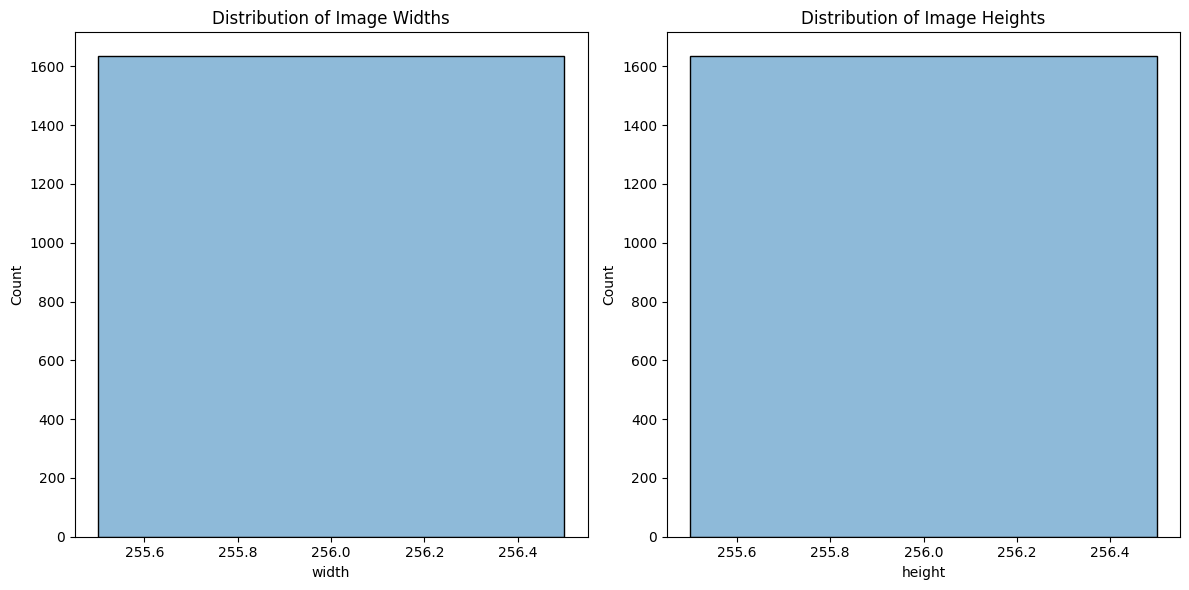

In [9]:
# Image Dimensions
print("\nImage Dimensions Summary Statistics:")
print(df[['width', 'height']].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['width'], kde=True)
plt.title('Distribution of Image Widths')
plt.subplot(1, 2, 2)
sns.histplot(df['height'], kde=True)
plt.title('Distribution of Image Heights')
plt.tight_layout()
plt.show()


Bounding Box Summary Statistics:
              xmin         ymin         xmax         ymax
count  1634.000000  1634.000000  1634.000000  1634.000000
mean    103.878213   110.159731   141.351285   143.613831
std      68.164173    64.835981    68.708078    65.702550
min       1.000000     1.000000     5.000000    19.000000
25%      47.000000    58.000000    85.000000    87.000000
50%     101.000000   112.000000   141.000000   146.000000
75%     157.000000   159.000000   197.000000   197.000000
max     248.000000   244.000000   256.000000   256.000000


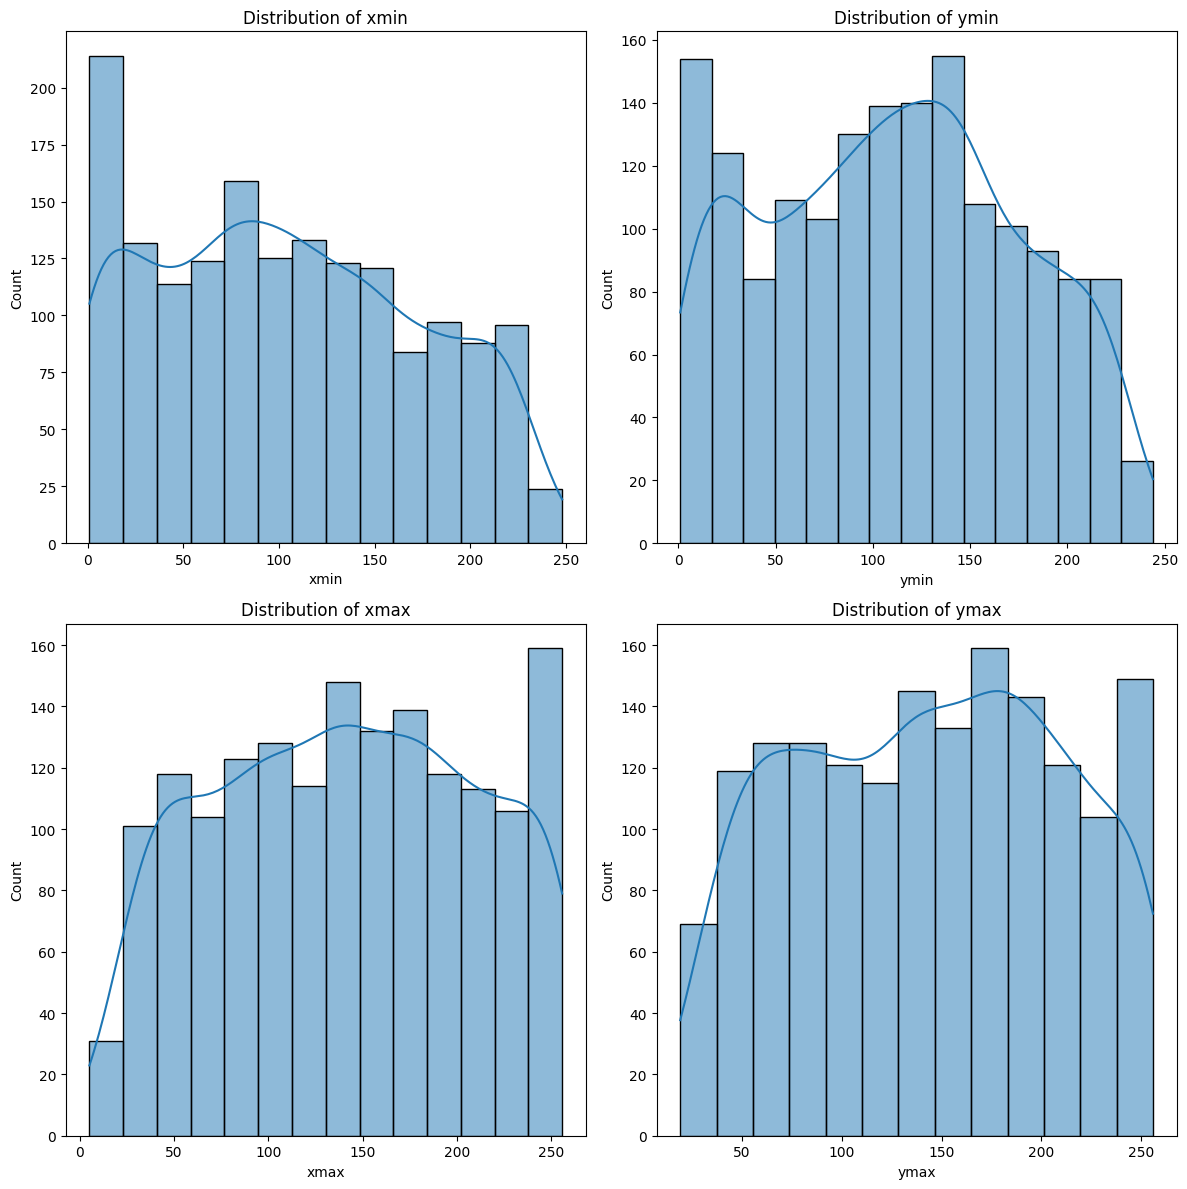

In [10]:
# Bounding Box Analysis
print("\nBounding Box Summary Statistics:")
print(df[['xmin', 'ymin', 'xmax', 'ymax']].describe())

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.histplot(df['xmin'], kde=True)
plt.title('Distribution of xmin')

plt.subplot(2, 2, 2)
sns.histplot(df['ymin'], kde=True)
plt.title('Distribution of ymin')

plt.subplot(2, 2, 3)
sns.histplot(df['xmax'], kde=True)
plt.title('Distribution of xmax')

plt.subplot(2, 2, 4)
sns.histplot(df['ymax'], kde=True)
plt.title('Distribution of ymax')

plt.tight_layout()
plt.show()

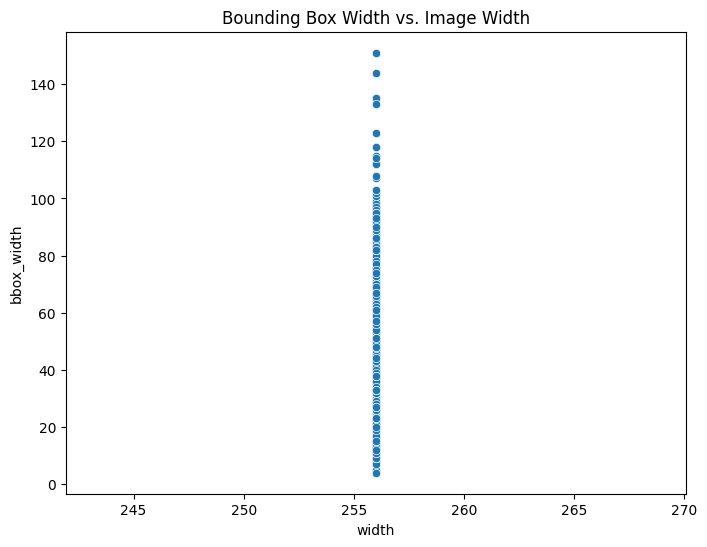

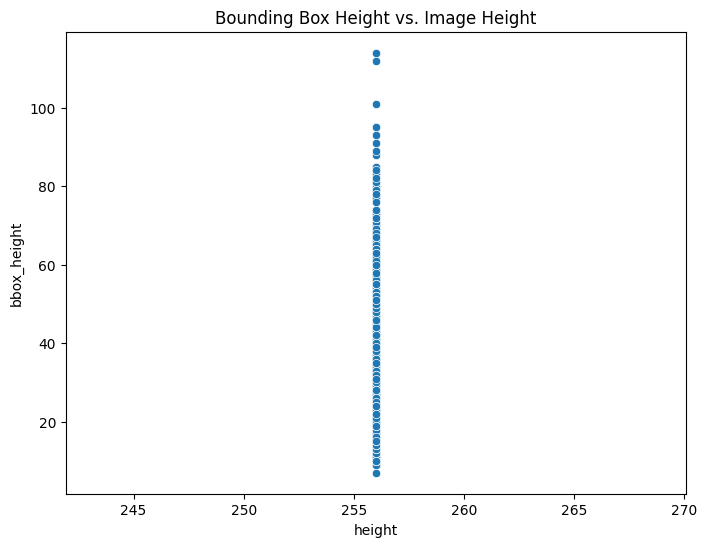

In [11]:
# Relationship between bounding box dimensions and image dimensions
df['bbox_width'] = df['xmax'] - df['xmin']
df['bbox_height'] = df['ymax'] - df['ymin']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='width', y='bbox_width', data=df)
plt.title('Bounding Box Width vs. Image Width')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='bbox_height', data=df)
plt.title('Bounding Box Height vs. Image Height')
plt.show()

In [12]:
# Assign a binary label (0 in this case, as we only have one class)
df['label'] = 0

# Create full image paths
df['image_path'] = 'images/' + df['filename']

# Create the list of tuples
image_label_tuples = list(zip(df['image_path'], df['label']))

# Print the first few elements of the list
print(image_label_tuples[:5])

[('images/10.jpg', 0), ('images/10.jpg', 0), ('images/10.jpg', 0), ('images/10.jpg', 0), ('images/10.jpg', 0)]


In [13]:
# Split the data into training, validation, and testing sets.

from sklearn.model_selection import train_test_split

# Assuming 'image_label_tuples' is your list of (image_path, label) tuples
train_val_tuples, test_tuples = train_test_split(image_label_tuples, test_size=0.2, random_state=42)  # 20% for testing
train_tuples, val_tuples = train_test_split(train_val_tuples, test_size=0.25, random_state=42) # 20% of 80% for validation

print(f"Training set size: {len(train_tuples)}")
print(f"Validation set size: {len(val_tuples)}")
print(f"Testing set size: {len(test_tuples)}")


Training set size: 980
Validation set size: 327
Testing set size: 327


In [ ]:
# Data preprocessing 
image_size = (256, 256)
batch_size = 32

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, image_size)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image


def load_data(image_label_tuples):
  image_paths = [item[0] for item in image_label_tuples]
  labels = [item[1] for item in image_label_tuples]

  images = [preprocess_image(path) for path in image_paths]

  images = tf.stack(images)
  labels = tf.convert_to_tensor(labels)

  return images, labels